<a href="https://www.kaggle.com/code/ahmedrushdi/facemask?scriptVersionId=122026004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install xmltodict
!pip install seaborn_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 76.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: importlib_metadata
    Found existing installation: importlib-metadata 4.11.4
    Uninstalling importlib-metadata-4.11.4:
      Successfully uninstalled importlib-metadata-4.11.4
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
virtualenv 20.17.1 requires importlib-metadata>=4.8.3; python_version < "3.8", but you have importlib-metadata 1.7.0 which is incompatible.
pynndescent 0.5.8 requires importlib-metadata>=4.8.1; python_version < "3.8", but you have importlib-metadata 1.7.0 which is incompatible.
pydocstyle 6.2.3 requires importlib-metadata<5.0.0,>=2.0.0; python_version

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
# from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import xmltodict
import seaborn_image as isns
path = "/kaggle/input/face-mask-detection/annotations"
img_path = "/kaggle/input/face-mask-detection/images"

In [3]:
class annotations:
    class __obj:
        def __init__(self, objdict : dict):
#             print(objdict)
            self.label   = objdict['name'  ]
            self.bbox = objdict['bndbox']
            
        def __repr__(self):
            return f'\n\tname={self.name}, bndbox={self.bndbox}'
            
    def __init__(self, annotaion):         
        self.objs = [self.__obj(i) for i in annotaion['object'  ]] if (type(annotaion['object']) == type(list()))\
                    else [self.__obj(annotaion['object'])]

        self.filename = annotaion['filename']
    
    def __repr__(self):
        return f'filename={self.filename}, objs={self.objs}'
        
    def __len__(self):
        return len(objs)
    
    def load(self, images_path):
        file_path = f'{images_path}/{self.filename}'
        image = cv2.imread(file_path)
        faces = []
        labels = []
        for obj in self.objs:
            xmin, xmax, ymin, ymax = int(obj.bbox['xmin']), int(obj.bbox['xmax']), int(obj.bbox['ymin']), int(obj.bbox['ymax'])
            faces.append(image[ymin:ymax, xmin:xmax, ...])
            labels.append(obj.label)
        del image
        return faces, labels
    

In [4]:
# %%debug

sum_len = 0
sum_files = 0
sum_bbox = {'xmin': 0, 'xmax': 0, 'ymin': 0, 'ymax': 0}
annotaionns_list = list()
for index, file_path in enumerate(glob.glob(f"{path}/*.xml")):
    
    with open(file_path) as file:
        x = annotations(xmltodict.parse(file.read())['annotation'])
        annotaionns_list.append(x)
        sum_len += len(x.objs)

In [5]:
dataset = np.array([i.load(img_path) for i in annotaionns_list]).T

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [6]:
dataset.shape

(2, 853)

In [7]:
x, y= dataset
x = [img   for imgs   in x for img   in imgs  ]
y = [label for labels in y for label in labels]

In [8]:
print(len(x), len(y))

4072 4072


In [9]:
max(x,key = lambda z: z.shape[0]*z.shape[1]).shape

(337, 317, 3)

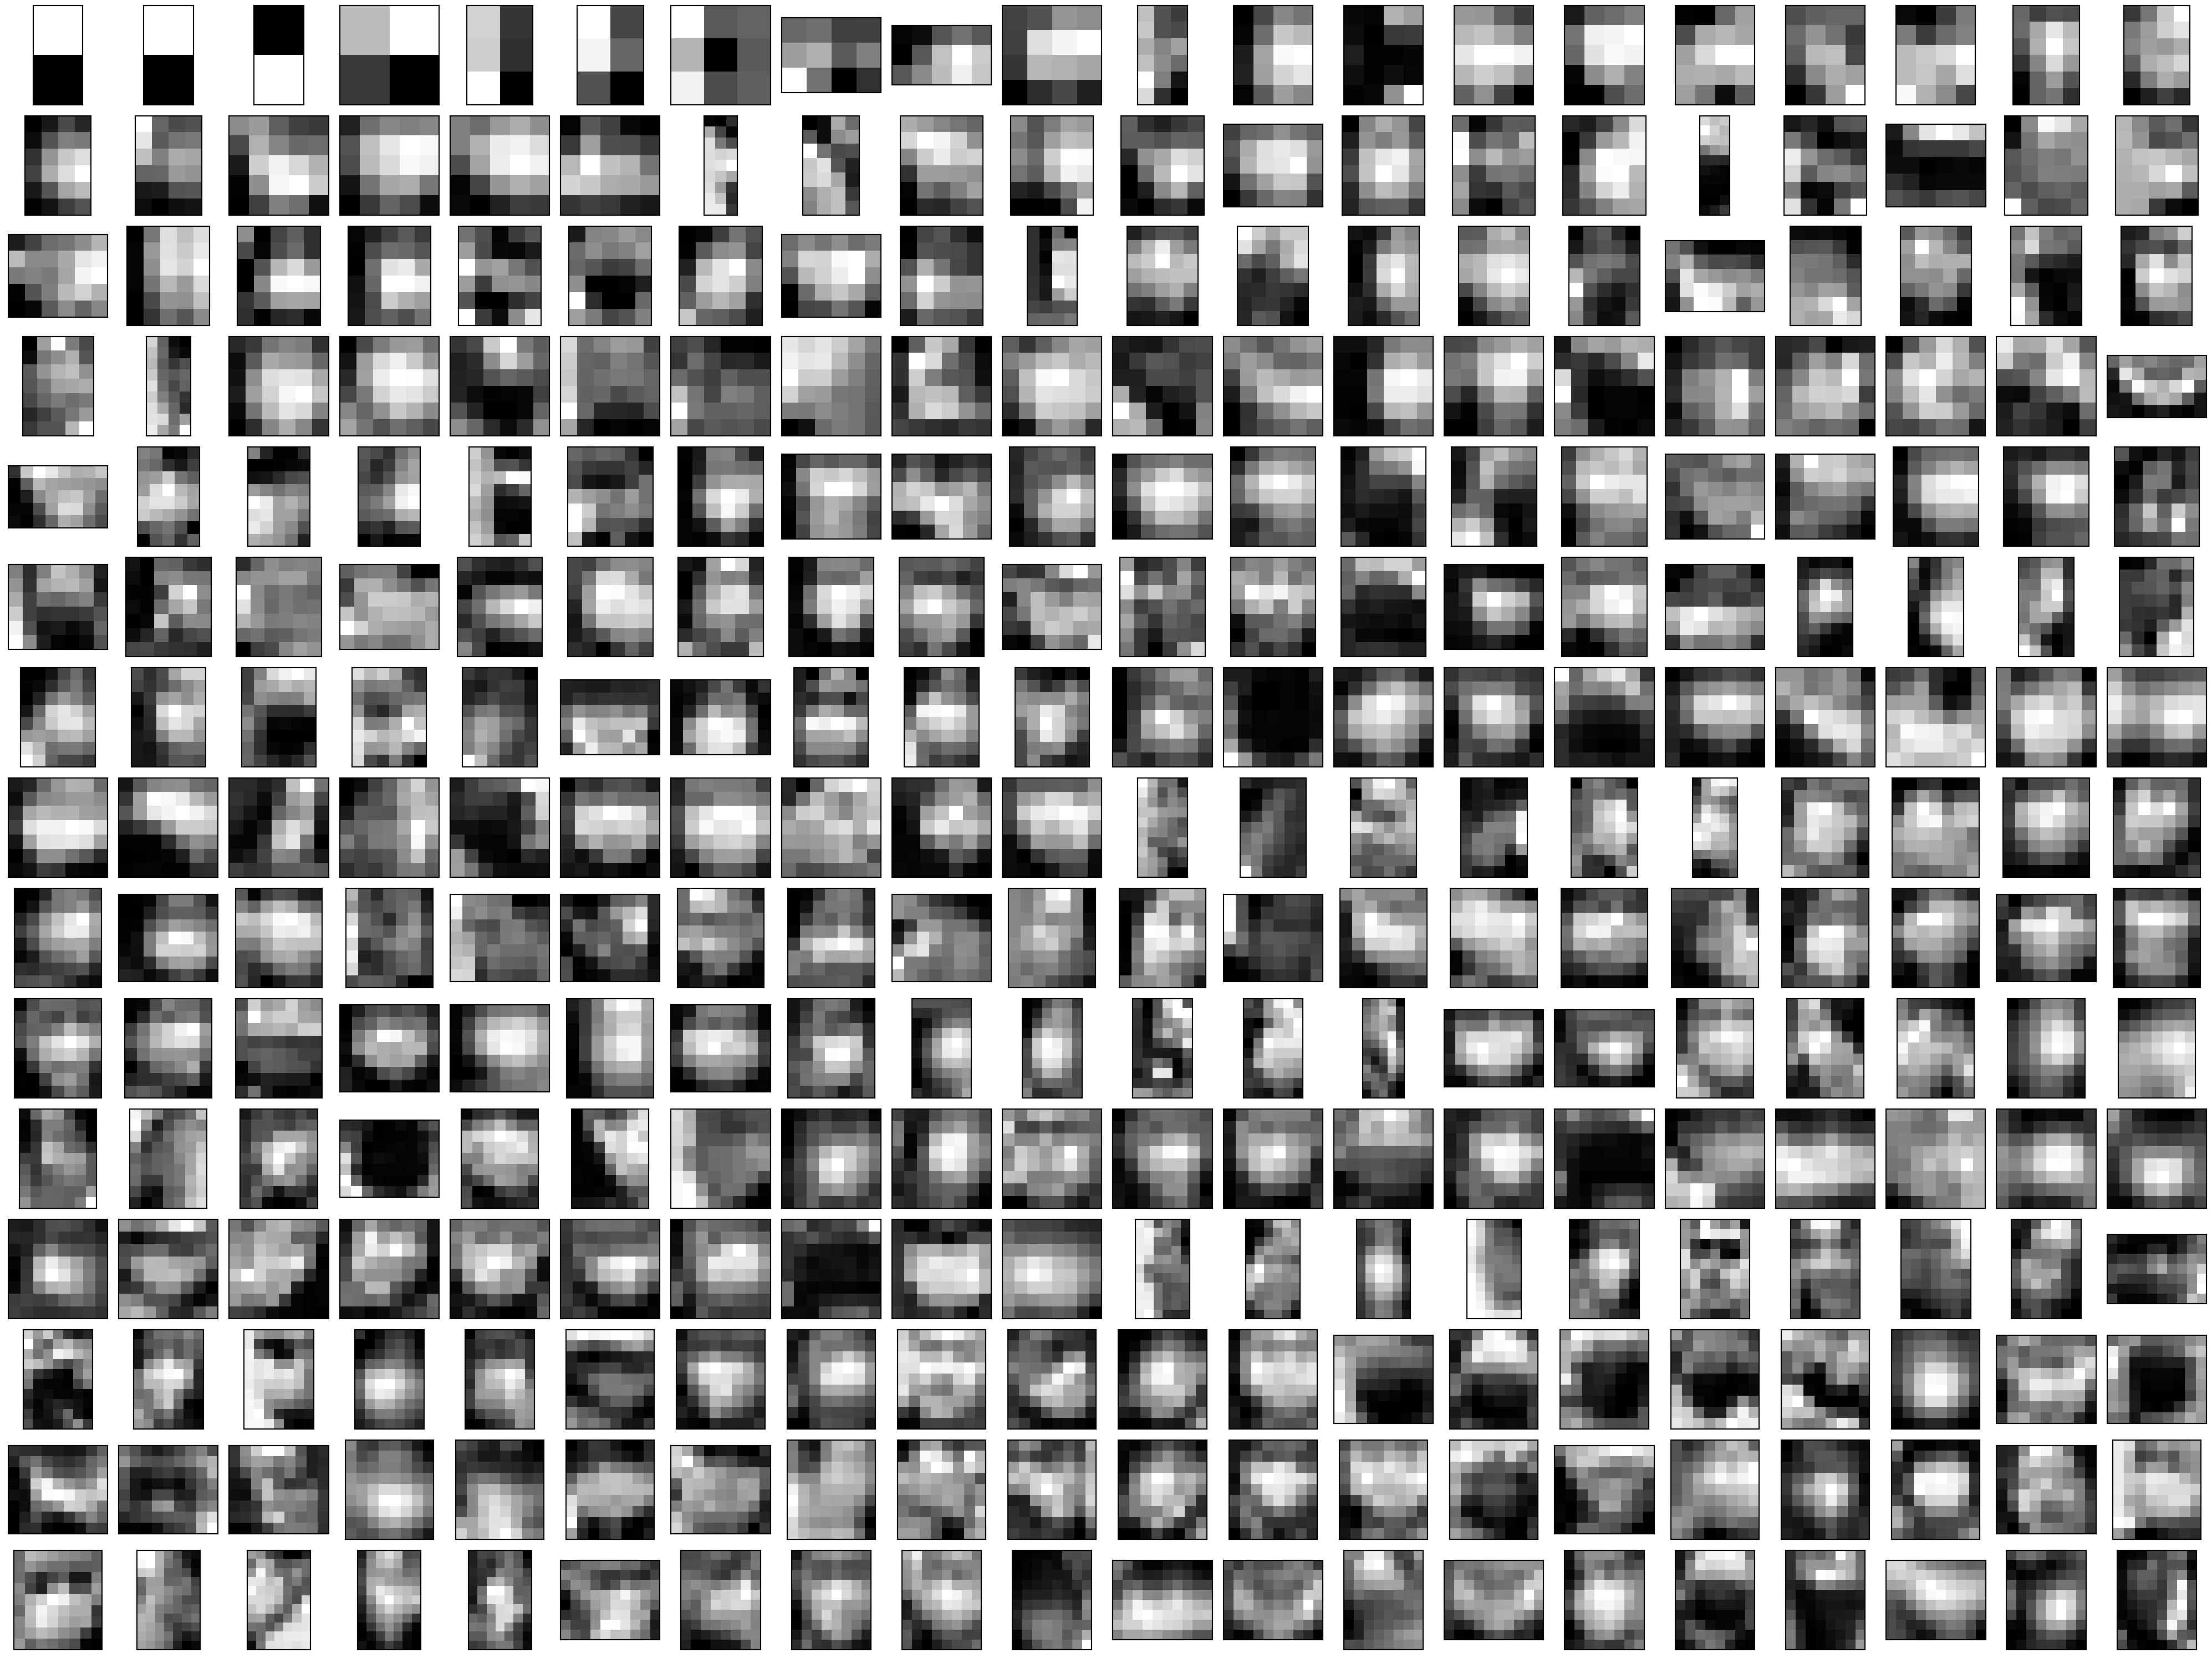

In [10]:
g = isns.ImageGrid(
            sorted(x, key = lambda z: z.shape[0]*z.shape[1])[:300],
            map_func=lambda im: im.mean(axis = -1)[::-1,::-1],
            cbar=False,
            height=2,
            cmap="gray",
            col_wrap=20)

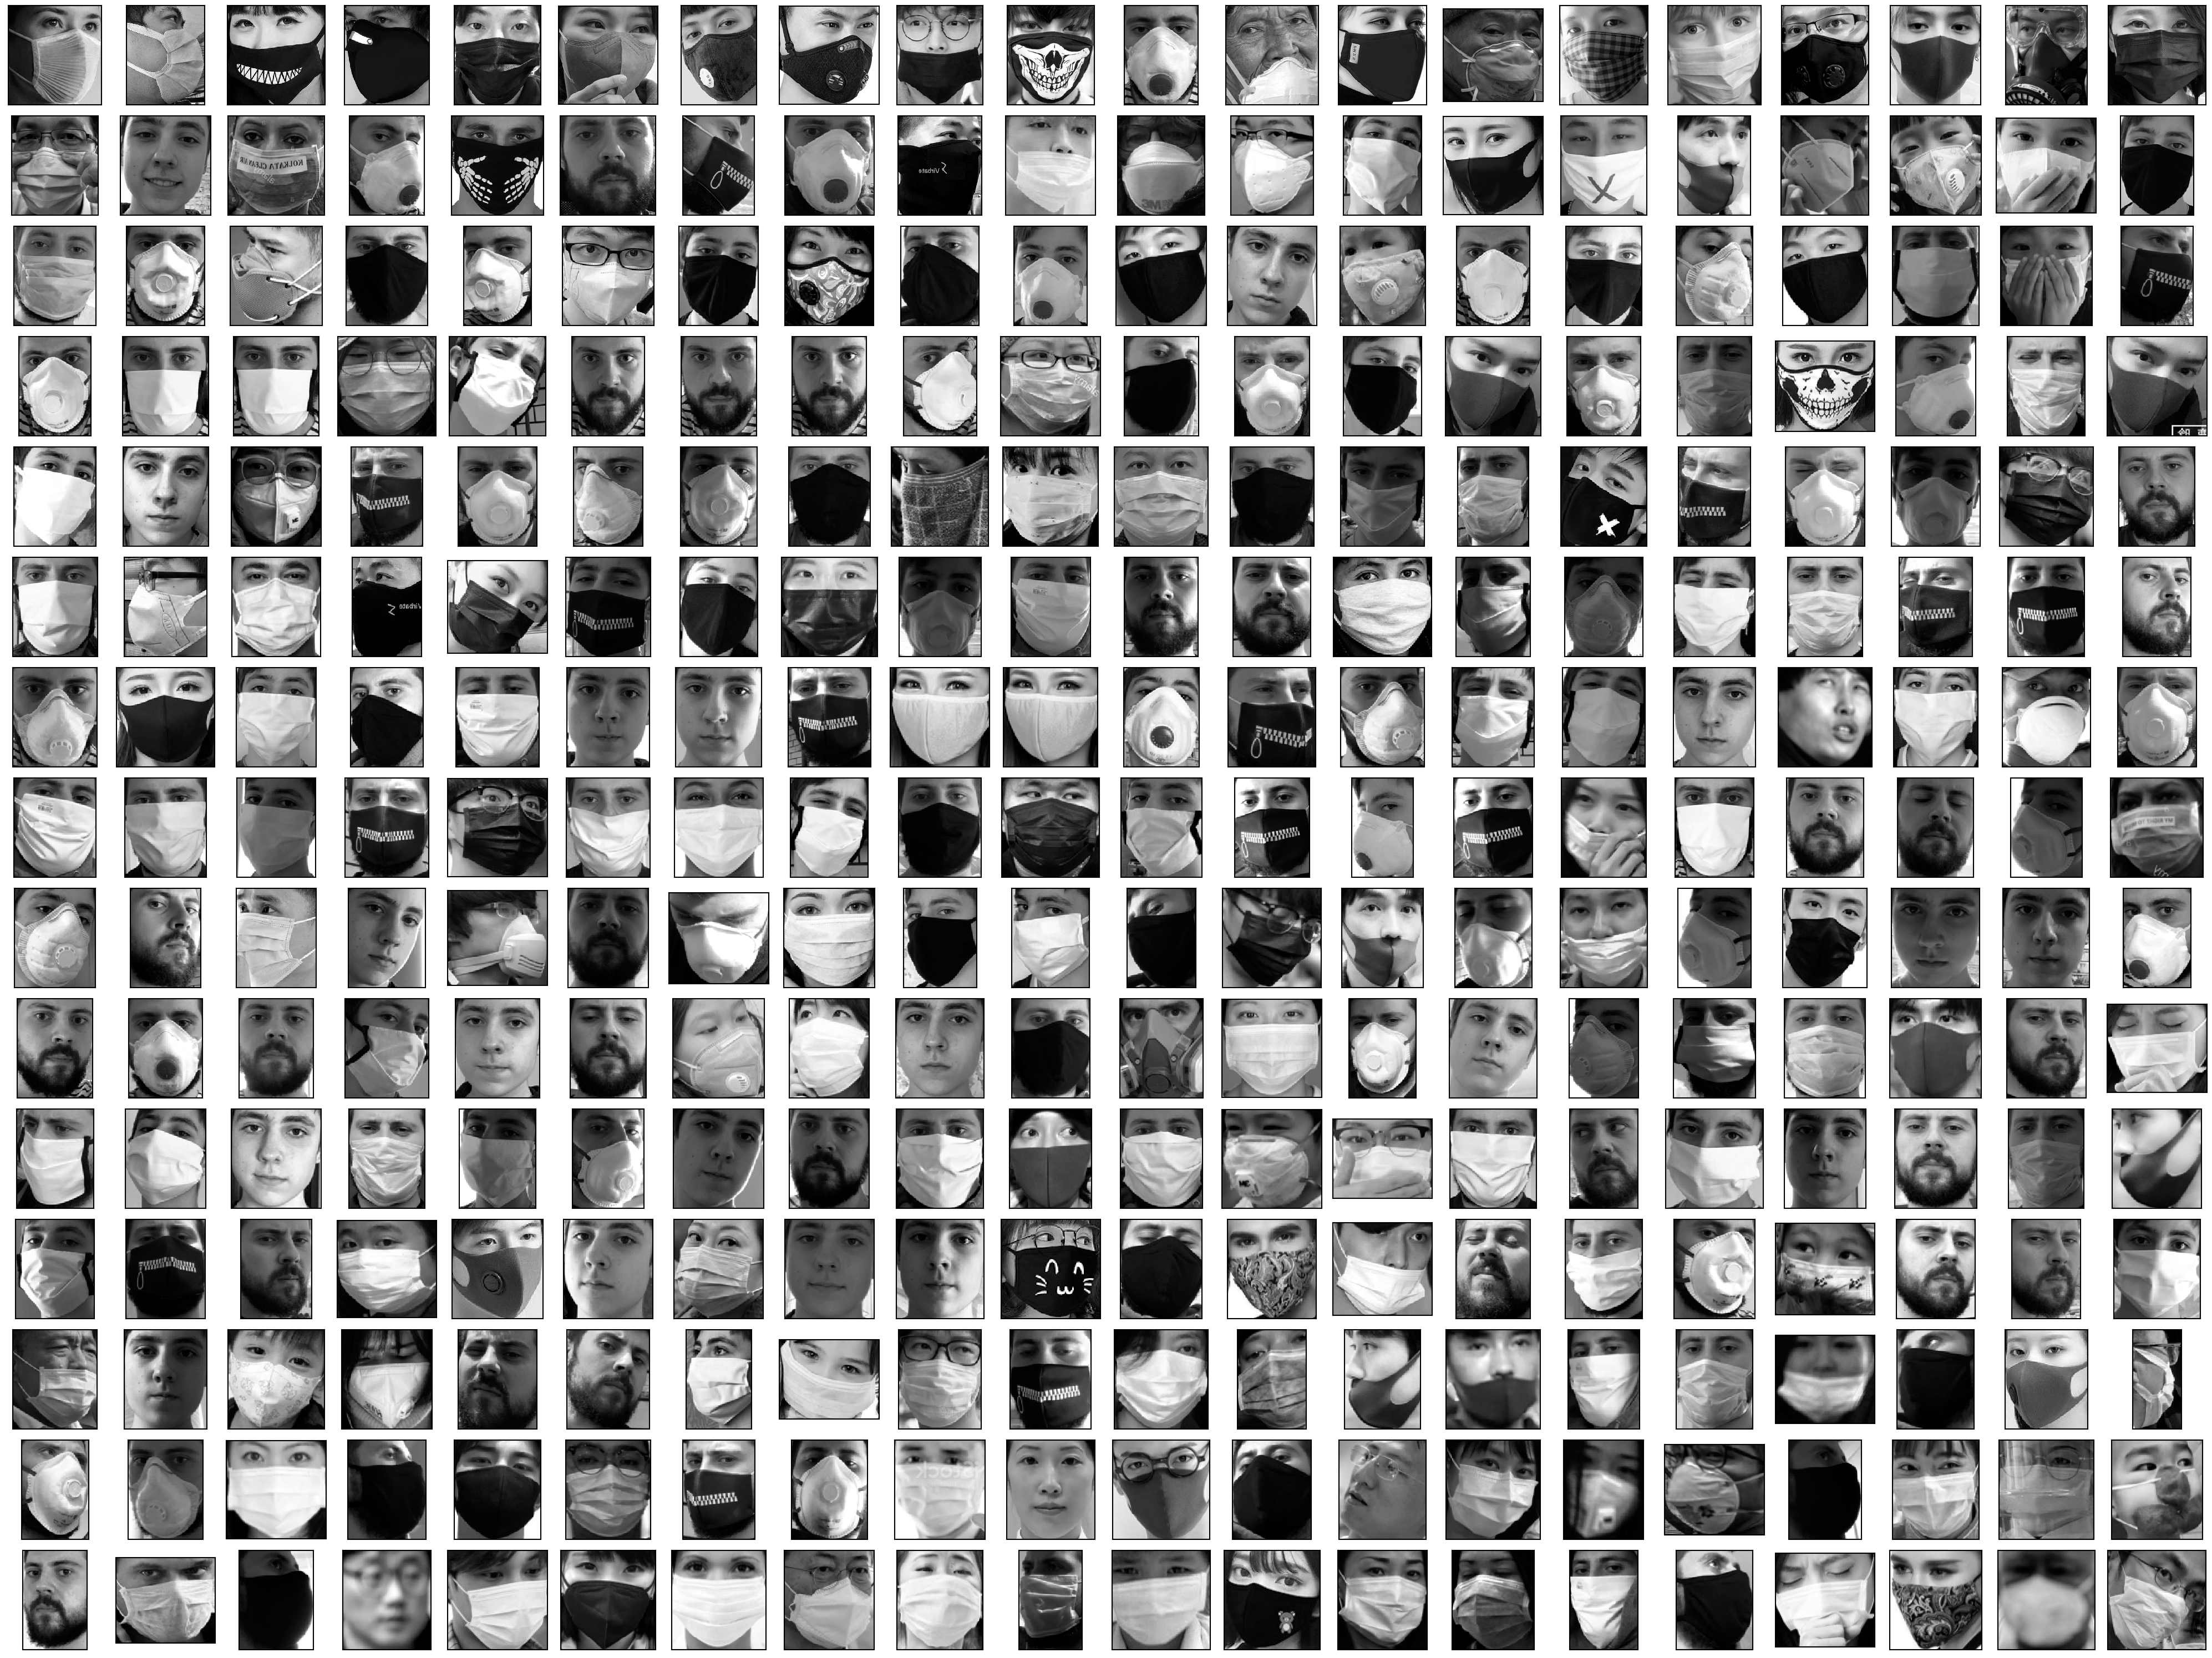

In [11]:
g = isns.ImageGrid(
            list(reversed(sorted(x, key = lambda z: z.shape[0]*z.shape[1])))[:300],
            map_func=lambda im: im.mean(axis = -1)[::-1,::-1],
            cbar=False,
            height=2,
            cmap="gray",
            col_wrap=20)